Plot results from cav1 diffusion analysis runs, for SM and DPPE lipid tracking, at cav1 sites and random sites. Compare results in violin plots.

In [3]:
import sys
sys.path.append("..")
from DiffusionAnalysis import DiffusionAnalysis

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import os
import seaborn as sns

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'arial'

def f_msd(dt, D, sigma):
    dim = 2  # dimensions of diffusion extent
    Rblur = 1/6.2  # blurring factor (MINFLUX)
    dtmean = 85.7e-6  # smallest (and median) dt between localizations
    return 2*dim*D*dt + 2*dim*sigma**2 - 4*dim*Rblur*D*dtmean

parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

In [ ]:
##### COMBINE PRE-ANALYSED DATASETS AND PLOT RESULTS

### PLOTTING PARAMS
%matplotlib inline

n_tracks_lim_incl = 20
n_tracks_lim_dapp = 5
fit_len_thresh = 15
n_tracks_lim_dtranscirc = 20
n_locs_dtrans = 50

In [5]:
## RANDOM SM - LOAD DATA
analysis0214 = DiffusionAnalysis('random-SM-0214')
analysis0214.load_pickleddata(os.path.join(parentdir, 'exampledata\\cav1\\random-sm\\240214'))
analysis0214.roi_data['date'] = pd.DataFrame(['0214' for i in range(len(analysis0214.roi_data))])
analysis0214.track_data['date'] = pd.DataFrame(['0214' for i in range(len(analysis0214.track_data))])

analysis0925 = DiffusionAnalysis('random-SM-0925')
analysis0925.load_pickleddata(os.path.join(parentdir, 'exampledata\\cav1\\random-sm\\240925'))
analysis0925.roi_data['date'] = pd.DataFrame(['0925' for i in range(len(analysis0925.roi_data))])
analysis0925.track_data['date'] = pd.DataFrame(['0925' for i in range(len(analysis0925.track_data))])

roi_data_comb_random_sm = pd.concat([analysis0214.roi_data, analysis0925.roi_data])
track_data_comb_random_sm = pd.concat([analysis0214.track_data, analysis0925.track_data])

In [6]:
## RANDOM DPPE - LOAD DATA
analysis0214 = DiffusionAnalysis('random-DPPE-0214')
analysis0214.load_pickleddata(os.path.join(parentdir, 'exampledata\\cav1\\random-dppe\\240214'))
analysis0214.roi_data['date'] = pd.DataFrame(['0214' for i in range(len(analysis0214.roi_data))])
analysis0214.track_data['date'] = pd.DataFrame(['0214' for i in range(len(analysis0214.track_data))])

analysis0925 = DiffusionAnalysis('random-DPPE-0925')
analysis0925.load_pickleddata(os.path.join(parentdir, 'exampledata\\cav1\\random-dppe\\240214'))
analysis0925.roi_data['date'] = pd.DataFrame(['0925' for i in range(len(analysis0925.roi_data))])
analysis0925.track_data['date'] = pd.DataFrame(['0925' for i in range(len(analysis0925.track_data))])

roi_data_comb_random_dppe = pd.concat([analysis0214.roi_data, analysis0925.roi_data])
track_data_comb_random_dppe = pd.concat([analysis0214.track_data, analysis0925.track_data])

In [7]:
## SITE DPPE - LOAD DATA
analysis0209 = DiffusionAnalysis('site-DPPE-0209')
analysis0209.load_pickleddata(os.path.join(parentdir, 'exampledata\\cav1\\site-dppe\\240209'))
analysis0209.roi_data['date'] = pd.DataFrame(['0209' for i in range(len(analysis0209.roi_data))])
analysis0209.track_data['date'] = pd.DataFrame(['0209' for i in range(len(analysis0209.track_data))])

analysis0925 = DiffusionAnalysis('site-DPPE-0925')
analysis0925.load_pickleddata(os.path.join(parentdir, 'exampledata\\cav1\\site-dppe\\240925'))
analysis0925.roi_data['date'] = pd.DataFrame(['0925' for i in range(len(analysis0925.roi_data))])
analysis0925.track_data['date'] = pd.DataFrame(['0925' for i in range(len(analysis0925.track_data))])

roi_data_comb_site_dppe = pd.concat([analysis0209.roi_data, analysis0925.roi_data])
track_data_comb_site_dppe = pd.concat([analysis0209.track_data, analysis0925.track_data])

In [8]:
## SITE SM - LOAD DATA
analysis0209 = DiffusionAnalysis('site-SM-0209')
analysis0209.load_pickleddata(os.path.join(parentdir, 'exampledata\\cav1\\site-sm\\240209'))
analysis0209.roi_data['date'] = pd.DataFrame(['0209' for i in range(len(analysis0209.roi_data))])
analysis0209.track_data['date'] = pd.DataFrame(['0209' for i in range(len(analysis0209.track_data))])

analysis0925 = DiffusionAnalysis('site-SM-0925')
analysis0925.load_pickleddata(os.path.join(parentdir, 'exampledata\\cav1\\site-sm\\240925'))
analysis0925.roi_data['date'] = pd.DataFrame(['0925' for i in range(len(analysis0925.roi_data))])
analysis0925.track_data['date'] = pd.DataFrame(['0925' for i in range(len(analysis0925.track_data))])

roi_data_comb_site_sm = pd.concat([analysis0209.roi_data, analysis0925.roi_data])
track_data_comb_site_sm = pd.concat([analysis0209.track_data, analysis0925.track_data])

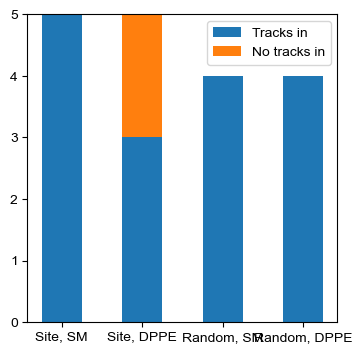

In [9]:
### COUNT ROIS WITH TRACKS INSIDE SIDE
# NUMBER OF ROIS
num_rois = []
num_rois_trackin = []
num_rois_trackout = []
num_rois.append(len(roi_data_comb_site_sm))
num_rois_trackin.append(np.sum(np.sum(roi_data_comb_site_sm['tracks_in_ratio']!=0)))
num_rois_trackout.append(np.sum(np.sum(roi_data_comb_site_sm['tracks_in_ratio']==0)))
num_rois.append(len(roi_data_comb_site_dppe))
num_rois_trackin.append(np.sum(np.sum(roi_data_comb_site_dppe['tracks_in_ratio']!=0)))
num_rois_trackout.append(np.sum(np.sum(roi_data_comb_site_dppe['tracks_in_ratio']==0)))
num_rois.append(len(roi_data_comb_random_sm))
num_rois_trackin.append(np.sum(np.sum(roi_data_comb_random_sm['tracks_in_ratio']!=0)))
num_rois_trackout.append(np.sum(np.sum(roi_data_comb_random_sm['tracks_in_ratio']==0)))
num_rois.append(len(roi_data_comb_random_dppe))
num_rois_trackin.append(np.sum(np.sum(roi_data_comb_random_dppe['tracks_in_ratio']!=0)))
num_rois_trackout.append(np.sum(np.sum(roi_data_comb_random_dppe['tracks_in_ratio']==0)))

num_rois_counts = {
    "Tracks in": np.array(num_rois_trackin),
    "No tracks in": np.array(num_rois_trackout),
}
width = 0.5

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
bottom = np.zeros(4)
for boolean, roi_count in num_rois_counts.items():
    p = ax.bar(('Site, SM', 'Site, DPPE', 'Random, SM', 'Random, DPPE'), roi_count, width, label=boolean, bottom=bottom)
    bottom += roi_count
plt.legend()
plt.show()

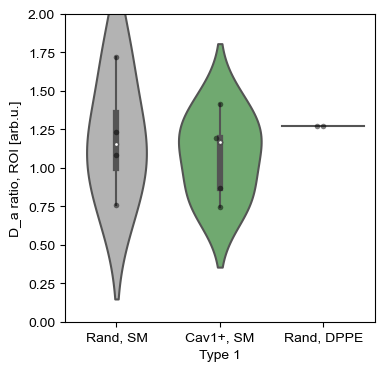

SM random: 1.197 +- 0.174 µm^2/s
SM site: 1.078 +- 0.108 µm^2/s
DPPE random: 1.272 +- 0.000 µm^2/s
DPPE site: nan +- nan µm^2/s
SM random
TtestResult(statistic=0.9824149678215433, pvalue=0.3983376895853544, df=3)
SM site
TtestResult(statistic=0.6461740776945882, pvalue=0.5533706027817005, df=4)
DPPE random
TtestResult(statistic=inf, pvalue=0.0, df=1)
DPPE site
TtestResult(statistic=nan, pvalue=nan, df=-1)


In [10]:
### ALL - DAPP RATIO - VIOLIN + SWARM

dapps_all_smsite = []
dates = track_data_comb_site_sm['date'].unique()
for date in dates:
    date_data = track_data_comb_site_sm[track_data_comb_site_sm['date']==date].copy()
    confs = date_data['confidx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['confidx']==conf].copy()
        rois = conf_data['roiidx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roiidx']==roi].copy()
            dapps_ins = []
            dapps_outs = []
            for _, row in roi_data.iterrows():
                if row['inout_flag'] == True:
                    if len(row['dists_in']) > 0:
                        dists_in = row['dists_in']
                        dts_in = row['dts_in']
                        if len(dists_in) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_in, dists_in))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_in, dists_in))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_ins.append(popt_msd[0])
                    if len(row['dists_out']) > 0:
                        dists_out = row['dists_out']
                        dts_out = row['dts_out']
                        if len(dists_out) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_out, dists_out))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_out, dists_out))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_outs.append(popt_msd[0])
            if len(dapps_ins) > n_tracks_lim_dapp and len(dapps_outs) > n_tracks_lim_dapp and np.mean(dapps_ins)>0 and np.mean(dapps_outs)>0:
                dapps_all_smsite.append(np.array([np.mean(dapps_ins),np.mean(dapps_outs)]))
dapps_all_smrandom = []
dates = track_data_comb_random_sm['date'].unique()
for date in dates:
    date_data = track_data_comb_random_sm[track_data_comb_random_sm['date']==date].copy()
    confs = date_data['confidx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['confidx']==conf].copy()
        rois = conf_data['roiidx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roiidx']==roi].copy()
            dapps_ins = []
            dapps_outs = []
            for _, row in roi_data.iterrows():
                if row['inout_flag'] == True:
                    if len(row['dists_in']) > 0:
                        dists_in = row['dists_in']
                        dts_in = row['dts_in']
                        if len(dists_in) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_in, dists_in))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_in, dists_in))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_ins.append(popt_msd[0])
                    if len(row['dists_out']) > 0:
                        dists_out = row['dists_out']
                        dts_out = row['dts_out']
                        if len(dists_out) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_out, dists_out))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_out, dists_out))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_outs.append(popt_msd[0])
            if len(dapps_ins) > n_tracks_lim_dapp and len(dapps_outs) > n_tracks_lim_dapp and np.mean(dapps_ins)>0 and np.mean(dapps_outs)>0:
                dapps_all_smrandom.append(np.array([np.mean(dapps_ins),np.mean(dapps_outs)]))
dapps_all_dppesite = []
dates = track_data_comb_site_dppe['date'].unique()
for date in dates:
    date_data = track_data_comb_site_dppe[track_data_comb_site_dppe['date']==date].copy()
    confs = date_data['confidx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['confidx']==conf].copy()
        rois = conf_data['roiidx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roiidx']==roi].copy()
            dapps_ins = []
            dapps_outs = []
            for _, row in roi_data.iterrows():
                if row['inout_flag'] == True:
                    if len(row['dists_in']) > 0:
                        dists_in = row['dists_in']
                        dts_in = row['dts_in']
                        if len(dists_in) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_in, dists_in))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_in, dists_in))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_ins.append(popt_msd[0])
                    if len(row['dists_out']) > 0:
                        dists_out = row['dists_out']
                        dts_out = row['dts_out']
                        if len(dists_out) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_out, dists_out))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_out, dists_out))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_outs.append(popt_msd[0])
            if len(dapps_ins) > n_tracks_lim_dapp and len(dapps_outs) > n_tracks_lim_dapp and np.mean(dapps_ins)>0 and np.mean(dapps_outs)>0:
                dapps_all_dppesite.append(np.array([np.mean(dapps_ins),np.mean(dapps_outs)]))
dapps_all_dpperandom = []
dates = track_data_comb_random_dppe['date'].unique()
for date in dates:
    date_data = track_data_comb_random_dppe[track_data_comb_random_dppe['date']==date].copy()
    confs = date_data['confidx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['confidx']==conf].copy()
        rois = conf_data['roiidx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roiidx']==roi].copy()
            dapps_ins = []
            dapps_outs = []
            for _, row in roi_data.iterrows():
                if row['inout_flag'] == True:
                    if len(row['dists_in']) > 0:
                        dists_in = row['dists_in']
                        dts_in = row['dts_in']
                        if len(dists_in) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_in, dists_in))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_in, dists_in))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_ins.append(popt_msd[0])
                    if len(row['dists_out']) > 0:
                        dists_out = row['dists_out']
                        dts_out = row['dts_out']
                        if len(dists_out) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_out, dists_out))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_out, dists_out))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_outs.append(popt_msd[0])
            if len(dapps_ins) > n_tracks_lim_dapp and len(dapps_outs) > n_tracks_lim_dapp and np.mean(dapps_ins)>0 and np.mean(dapps_outs)>0:
                dapps_all_dpperandom.append(np.array([np.mean(dapps_ins),np.mean(dapps_outs)]))

dapps_ratio_smrandom = [dapps[0]/dapps[1] for dapps in dapps_all_smrandom]
dapps_ratio_smrandom = np.array([rat for rat in dapps_ratio_smrandom if rat==rat])
dapps_ratio_smsite = [dapps[0]/dapps[1] for dapps in dapps_all_smsite]
dapps_ratio_smsite = np.array([rat for rat in dapps_ratio_smsite if rat==rat])
dapps_ratio_dpperandom = [dapps[0]/dapps[1] for dapps in dapps_all_dpperandom]
dapps_ratio_dpperandom = np.array([rat for rat in dapps_ratio_dpperandom if rat==rat])
dapps_ratio_dppesite = [dapps[0]/dapps[1] for dapps in dapps_all_dppesite]
dapps_ratio_dppesite = np.array([rat for rat in dapps_ratio_dppesite if rat==rat])

datasmrand = {'Type 1': ['Rand, SM'] * len(dapps_ratio_smrandom),
         'Total': np.array(dapps_ratio_smrandom)}
datasmsite = {'Type 1': ['Cav1+, SM'] * len(dapps_ratio_smsite),
         'Total': np.array(dapps_ratio_smsite)}
datadpperand = {'Type 1': ['Rand, DPPE'] * len(dapps_ratio_dpperandom),
         'Total': np.array(dapps_ratio_dpperandom)}
datadppesite = {'Type 1': ['Cav1+, DPPE'] * len(dapps_ratio_dppesite),
         'Total': np.array(dapps_ratio_dppesite)}
df = pd.concat([pd.DataFrame(d) for d in [datasmrand, datasmsite, datadpperand, datadppesite]], ignore_index=True)

# plot
fig = plt.figure(figsize=(4, 4))
my_palette = {'Rand, SM': (0.7,0.7,0.7), 'Cav1+, SM': (0.4,0.7,0.4), 'Rand, DPPE': (0.7,0.7,0.7), 'Cav1+, DPPE': (0.7,0.4,0.7)}
sns.swarmplot(x='Type 1', y='Total', data=df, color='#000000', size=4, alpha=0.5)
sns.violinplot(x='Type 1', y='Total', data=df, inner='box', palette=my_palette)
plt.ylabel('D_a ratio, ROI [arb.u.]')
plt.ylim(0,2)
plt.show()

print(f'SM random: {np.mean(dapps_ratio_smrandom):.3f} +- {np.std(dapps_ratio_smrandom)/np.sqrt(len(dapps_ratio_smrandom)):.3f} µm^2/s')
print(f'SM site: {np.mean(dapps_ratio_smsite):.3f} +- {np.std(dapps_ratio_smsite)/np.sqrt(len(dapps_ratio_smsite)):.3f} µm^2/s')
print(f'DPPE random: {np.mean(dapps_ratio_dpperandom):.3f} +- {np.std(dapps_ratio_dpperandom)/np.sqrt(len(dapps_ratio_dpperandom)):.3f} µm^2/s')
print(f'DPPE site: {np.mean(dapps_ratio_dppesite):.3f} +- {np.std(dapps_ratio_dppesite)/np.sqrt(len(dapps_ratio_dppesite)):.3f} µm^2/s')

result_rois = scipy.stats.ttest_1samp(dapps_ratio_smrandom, popmean=1)
print('SM random')
print(result_rois)
result_rois = scipy.stats.ttest_1samp(dapps_ratio_smsite, popmean=1)
print('SM site')
print(result_rois)
result_rois = scipy.stats.ttest_1samp(dapps_ratio_dpperandom, popmean=1)
print('DPPE random')
print(result_rois)
result_rois = scipy.stats.ttest_1samp(dapps_ratio_dppesite, popmean=1)
print('DPPE site')
print(result_rois)

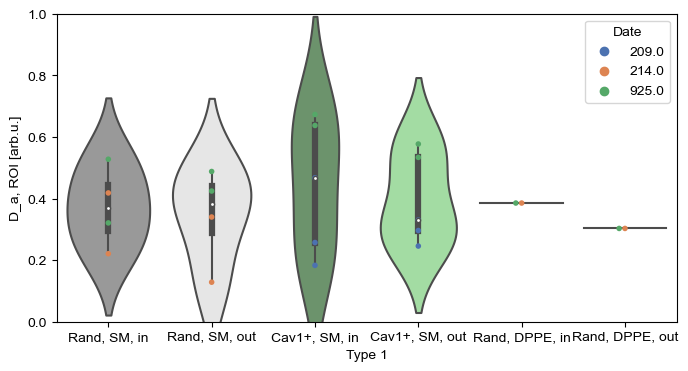

SM random in: 0.372 +- 0.057 µm^2/s
SM random out: 0.345 +- 0.068 µm^2/s
SM site in: 0.443 +- 0.088 µm^2/s
SM site out: 0.397 +- 0.060 µm^2/s
DPPE random in: 0.385 +- 0.000 µm^2/s
DPPE random out: 0.303 +- 0.000 µm^2/s
DPPE site in: nan +- nan µm^2/s
DPPE site out: nan +- nan µm^2/s
SM random
Ttest_indResult(statistic=0.26165241935449846, pvalue=0.8023398397410353)
SM site
Ttest_indResult(statistic=0.39586180777323793, pvalue=0.702554778152272)
DPPE random
Ttest_indResult(statistic=inf, pvalue=0.0)
DPPE site
Ttest_indResult(statistic=nan, pvalue=nan)


In [11]:
### ALL - DAPPs - VIOLIN + SWARM

dapps_all_smsite = []
dates = track_data_comb_site_sm['date'].unique()
for date in dates:
    date_data = track_data_comb_site_sm[track_data_comb_site_sm['date']==date].copy()
    confs = date_data['confidx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['confidx']==conf].copy()
        rois = conf_data['roiidx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roiidx']==roi].copy()
            dapps_ins = []
            dapps_outs = []
            for _, row in roi_data.iterrows():
                if row['inout_flag'] == True:
                    if len(row['dists_in']) > 0:
                        dists_in = row['dists_in']
                        dts_in = row['dts_in']
                        if len(dists_in) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_in, dists_in))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_in, dists_in))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_ins.append(popt_msd[0])
                    if len(row['dists_out']) > 0:
                        dists_out = row['dists_out']
                        dts_out = row['dts_out']
                        if len(dists_out) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_out, dists_out))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_out, dists_out))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_outs.append(popt_msd[0])
            if len(dapps_ins) > n_tracks_lim_dapp and len(dapps_outs) > n_tracks_lim_dapp and np.mean(dapps_ins)>0 and np.mean(dapps_outs)>0:
                dapps_all_smsite.append(np.array([np.mean(dapps_ins),np.mean(dapps_outs), int(date)]))
dapps_all_smrandom = []
dates = track_data_comb_random_sm['date'].unique()
for date in dates:
    date_data = track_data_comb_random_sm[track_data_comb_random_sm['date']==date].copy()
    confs = date_data['confidx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['confidx']==conf].copy()
        rois = conf_data['roiidx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roiidx']==roi].copy()
            dapps_ins = []
            dapps_outs = []
            for _, row in roi_data.iterrows():
                if row['inout_flag'] == True:
                    if len(row['dists_in']) > 0:
                        dists_in = row['dists_in']
                        dts_in = row['dts_in']
                        if len(dists_in) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_in, dists_in))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_in, dists_in))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_ins.append(popt_msd[0])
                    if len(row['dists_out']) > 0:
                        dists_out = row['dists_out']
                        dts_out = row['dts_out']
                        if len(dists_out) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_out, dists_out))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_out, dists_out))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_outs.append(popt_msd[0])
            if len(dapps_ins) > n_tracks_lim_dapp and len(dapps_outs) > n_tracks_lim_dapp and np.mean(dapps_ins)>0 and np.mean(dapps_outs)>0:
                dapps_all_smrandom.append(np.array([np.mean(dapps_ins),np.mean(dapps_outs), int(date)]))
dapps_all_dppesite = []
dates = track_data_comb_site_dppe['date'].unique()
for date in dates:
    date_data = track_data_comb_site_dppe[track_data_comb_site_dppe['date']==date].copy()
    confs = date_data['confidx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['confidx']==conf].copy()
        rois = conf_data['roiidx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roiidx']==roi].copy()
            dapps_ins = []
            dapps_outs = []
            for _, row in roi_data.iterrows():
                if row['inout_flag'] == True:
                    if len(row['dists_in']) > 0:
                        dists_in = row['dists_in']
                        dts_in = row['dts_in']
                        if len(dists_in) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_in, dists_in))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_in, dists_in))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_ins.append(popt_msd[0])
                    if len(row['dists_out']) > 0:
                        dists_out = row['dists_out']
                        dts_out = row['dts_out']
                        if len(dists_out) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_out, dists_out))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_out, dists_out))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_outs.append(popt_msd[0])
            if len(dapps_ins) > n_tracks_lim_dapp and len(dapps_outs) > n_tracks_lim_dapp and np.mean(dapps_ins)>0 and np.mean(dapps_outs)>0:
                dapps_all_dppesite.append(np.array([np.mean(dapps_ins),np.mean(dapps_outs), int(date)]))
dapps_all_dpperandom = []
dates = track_data_comb_random_dppe['date'].unique()
for date in dates:
    date_data = track_data_comb_random_dppe[track_data_comb_random_dppe['date']==date].copy()
    confs = date_data['confidx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['confidx']==conf].copy()
        rois = conf_data['roiidx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roiidx']==roi].copy()
            dapps_ins = []
            dapps_outs = []
            for _, row in roi_data.iterrows():
                if row['inout_flag'] == True:
                    if len(row['dists_in']) > 0:
                        dists_in = row['dists_in']
                        dts_in = row['dts_in']
                        if len(dists_in) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_in, dists_in))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_in, dists_in))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_ins.append(popt_msd[0])
                    if len(row['dists_out']) > 0:
                        dists_out = row['dists_out']
                        dts_out = row['dts_out']
                        if len(dists_out) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts_out, dists_out))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts_out, dists_out))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            dapps_outs.append(popt_msd[0])
            if len(dapps_ins) > n_tracks_lim_dapp and len(dapps_outs) > n_tracks_lim_dapp and np.mean(dapps_ins)>0 and np.mean(dapps_outs)>0:
                dapps_all_dpperandom.append(np.array([np.mean(dapps_ins), np.mean(dapps_outs), int(date)]))
                

dapps_in_smrandom = [dapps[0] for dapps in dapps_all_smrandom]
dapps_out_smrandom = [dapps[1] for dapps in dapps_all_smrandom]
dates_smrandom = [dapps[2] for dapps in dapps_all_smrandom]
dapps_in_smrandom = np.array([rat for rat in dapps_in_smrandom if rat==rat])
dates_in_smrandom = np.array([date for date, rat in zip(dates_smrandom, dapps_in_smrandom) if rat==rat])
dapps_out_smrandom = np.array([rat for rat in dapps_out_smrandom if rat==rat])
dates_out_smrandom = np.array([date for date, rat in zip(dates_smrandom, dapps_out_smrandom) if rat==rat])

dapps_in_smsite = [dapps[0] for dapps in dapps_all_smsite]
dapps_out_smsite = [dapps[1] for dapps in dapps_all_smsite]
dates_smsite = [dapps[2] for dapps in dapps_all_smsite]
dapps_in_smsite = np.array([rat for rat in dapps_in_smsite if rat==rat])
dates_in_smsite = np.array([date for date, rat in zip(dates_smsite, dapps_in_smsite) if rat==rat])
dapps_out_smsite = np.array([rat for rat in dapps_out_smsite if rat==rat])
dates_out_smsite = np.array([date for date, rat in zip(dates_smsite, dapps_out_smsite) if rat==rat])

dapps_in_dpperandom = [dapps[0] for dapps in dapps_all_dpperandom]
dapps_out_dpperandom = [dapps[1] for dapps in dapps_all_dpperandom]
dates_dpperandom = [dapps[2] for dapps in dapps_all_dpperandom]
dapps_in_dpperandom = np.array([rat for rat in dapps_in_dpperandom if rat==rat])
dates_in_dpperandom = np.array([date for date, rat in zip(dates_dpperandom, dapps_in_dpperandom) if rat==rat])
dapps_out_dpperandom = np.array([rat for rat in dapps_out_dpperandom if rat==rat])
dates_out_dpperandom = np.array([date for date, rat in zip(dates_dpperandom, dapps_out_dpperandom) if rat==rat])

dapps_in_dppesite = [dapps[0] for dapps in dapps_all_dppesite]
dapps_out_dppesite = [dapps[1] for dapps in dapps_all_dppesite]
dates_dppesite = [dapps[2] for dapps in dapps_all_dppesite]
dapps_in_dppesite = np.array([rat for rat in dapps_in_dppesite if rat==rat])
dates_in_dppesite = np.array([date for date, rat in zip(dates_dppesite, dapps_in_dppesite) if rat==rat])
dapps_out_dppesite = np.array([rat for rat in dapps_out_dppesite if rat==rat])
dates_out_dppesite = np.array([date for date, rat in zip(dates_dppesite, dapps_out_dppesite) if rat==rat])

datasmrandin = {'Type 1': ['Rand, SM, in'] * len(dapps_in_smrandom),
                'Date': np.array(dates_in_smrandom),
                'Total': np.array(dapps_in_smrandom)}
datasmrandout = {'Type 1': ['Rand, SM, out'] * len(dapps_out_smrandom),
                'Date': np.array(dates_out_smrandom),
                'Total': np.array(dapps_out_smrandom)}
datasmsitein = {'Type 1': ['Cav1+, SM, in'] * len(dapps_in_smsite),
                'Date': np.array(dates_in_smsite),
                'Total': np.array(dapps_in_smsite)}
datasmsiteout = {'Type 1': ['Cav1+, SM, out'] * len(dapps_out_smsite),
                'Date': np.array(dates_out_smsite),
                'Total': np.array(dapps_out_smsite)}
datadpperandin = {'Type 1': ['Rand, DPPE, in'] * len(dapps_in_dpperandom),
                'Date': np.array(dates_in_dpperandom),
                'Total': np.array(dapps_in_dpperandom)}
datadpperandout = {'Type 1': ['Rand, DPPE, out'] * len(dapps_out_dpperandom),
                'Date': np.array(dates_out_dpperandom),
                'Total': np.array(dapps_out_dpperandom)}
datadppesitein = {'Type 1': ['Cav1+, DPPE, in'] * len(dapps_in_dppesite),
                'Date': np.array(dates_in_dppesite),
                'Total': np.array(dapps_in_dppesite)}
datadppesiteout = {'Type 1': ['Cav1+, DPPE, out'] * len(dapps_out_dppesite),
                'Date': np.array(dates_out_dppesite),
                'Total': np.array(dapps_out_dppesite)}
df = pd.concat([pd.DataFrame(d) for d in [datasmrandin, datasmrandout, datasmsitein, datasmsiteout, datadpperandin, datadpperandout, datadppesitein, datadppesiteout]], ignore_index=True)

# plot
fig = plt.figure(figsize=(8, 4))
my_palette = {'Rand, SM, in': (0.6,0.6,0.6), 'Rand, SM, out': (0.9,0.9,0.9), 'Cav1+, SM, in': (0.4,0.6,0.4), 'Cav1+, SM, out': (0.6,0.9,0.6), 'Rand, DPPE, in': (0.6,0.6,0.6), 'Rand, DPPE, out': (0.9,0.9,0.9), 'Cav1+, DPPE, in': (0.6,0.4,0.6), 'Cav1+, DPPE, out': (0.9,0.6,0.9)}
sns.swarmplot(x='Type 1', y='Total', hue='Date', data=df, size=4, alpha=1.0, palette="deep")
sns.violinplot(x='Type 1', y='Total', data=df, inner='box', palette=my_palette)
plt.ylabel('D_a, ROI [arb.u.]')
plt.ylim(0,1)
plt.show()

print(f'SM random in: {np.mean(dapps_in_smrandom):.3f} +- {np.std(dapps_in_smrandom)/np.sqrt(len(dapps_in_smrandom)):.3f} µm^2/s')
print(f'SM random out: {np.mean(dapps_out_smrandom):.3f} +- {np.std(dapps_out_smrandom)/np.sqrt(len(dapps_out_smrandom)):.3f} µm^2/s')
print(f'SM site in: {np.mean(dapps_in_smsite):.3f} +- {np.std(dapps_in_smsite)/np.sqrt(len(dapps_in_smsite)):.3f} µm^2/s')
print(f'SM site out: {np.mean(dapps_out_smsite):.3f} +- {np.std(dapps_out_smsite)/np.sqrt(len(dapps_out_smsite)):.3f} µm^2/s')
print(f'DPPE random in: {np.mean(dapps_in_dpperandom):.3f} +- {np.std(dapps_in_dpperandom)/np.sqrt(len(dapps_in_dpperandom)):.3f} µm^2/s')
print(f'DPPE random out: {np.mean(dapps_out_dpperandom):.3f} +- {np.std(dapps_out_dpperandom)/np.sqrt(len(dapps_out_dpperandom)):.3f} µm^2/s')
print(f'DPPE site in: {np.mean(dapps_in_dppesite):.3f} +- {np.std(dapps_in_dppesite)/np.sqrt(len(dapps_in_dppesite)):.3f} µm^2/s')
print(f'DPPE site out: {np.mean(dapps_out_dppesite):.3f} +- {np.std(dapps_out_dppesite)/np.sqrt(len(dapps_out_dppesite)):.3f} µm^2/s')

result_rois = scipy.stats.ttest_ind(dapps_in_smrandom, dapps_out_smrandom)
print('SM random')
print(result_rois)
result_rois = scipy.stats.ttest_ind(dapps_in_smsite, dapps_out_smsite)
print('SM site')
print(result_rois)
result_rois = scipy.stats.ttest_ind(dapps_in_dpperandom, dapps_out_dpperandom)
print('DPPE random')
print(result_rois)
result_rois = scipy.stats.ttest_ind(dapps_in_dppesite, dapps_out_dppesite)
print('DPPE site')
print(result_rois)

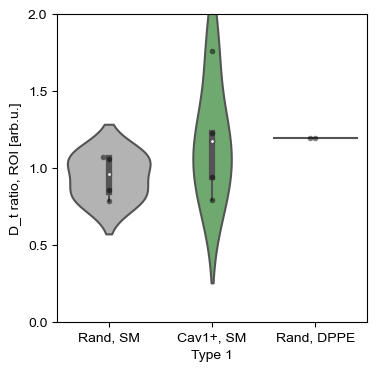

SM random: 0.942 +- 0.061 µm^2/s
SM site: 1.178 +- 0.148 µm^2/s
DPPE random: 1.190 +- 0.000 µm^2/s
DPPE site: nan +- nan µm^2/s
SM random
TtestResult(statistic=-0.8121975799527851, pvalue=0.2380704786582718, df=3)
SM site
TtestResult(statistic=1.074142887149653, pvalue=0.8283814637888893, df=4)
DPPE random
TtestResult(statistic=inf, pvalue=1.0, df=1)
DPPE site
TtestResult(statistic=nan, pvalue=nan, df=-1)


In [12]:
## ALL - DTRANS IN vs OUTSIDE - VIOLIN + SWARM
dtrans_randsm = []
dates = roi_data_comb_random_sm['date'].unique()
for date in dates:
    date_data = roi_data_comb_random_sm[roi_data_comb_random_sm['date']==date].copy()
    date_data_tracks = track_data_comb_random_sm[track_data_comb_random_sm['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if not roi_data['site_moved'].iloc[0]:
                if ~np.isnan(roi_data['tracks_in_ratio'].to_numpy()):
                    n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                    if n_tracks > n_tracks_lim_dtranscirc:
                        if len(roi_data['dtrans_site_inner'].to_numpy()[0]) > n_locs_dtrans:
                            dtrans_randsm.append(np.nanmean(roi_data['dtrans_site_inner'].to_numpy()[0])/np.nanmean(roi_data['dtrans_site_outside'].to_numpy()[0]))
dtrans_randsm = np.array(dtrans_randsm)

dtrans_sitesm = []
dates = roi_data_comb_site_sm['date'].unique()
for date in dates:
    date_data = roi_data_comb_site_sm[roi_data_comb_site_sm['date']==date].copy()
    date_data_tracks = track_data_comb_site_sm[track_data_comb_site_sm['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if not roi_data['site_moved'].iloc[0]:
                if ~np.isnan(roi_data['tracks_in_ratio'].to_numpy()):
                    n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                    if n_tracks > n_tracks_lim_dtranscirc:
                        if len(roi_data['dtrans_site_inner'].to_numpy()[0]) > n_locs_dtrans:
                            dtrans_sitesm.append(np.nanmean(roi_data['dtrans_site_inner'].to_numpy()[0])/np.nanmean(roi_data['dtrans_site_outside'].to_numpy()[0]))
dtrans_sitesm = np.array(dtrans_sitesm)

dtrans_randdppe = []
dates = roi_data_comb_random_dppe['date'].unique()
for date in dates:
    date_data = roi_data_comb_random_dppe[roi_data_comb_random_dppe['date']==date].copy()
    date_data_tracks = track_data_comb_random_dppe[track_data_comb_random_dppe['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if not roi_data['site_moved'].iloc[0]:
                if ~np.isnan(roi_data['tracks_in_ratio'].to_numpy()):
                    n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                    if n_tracks > n_tracks_lim_dtranscirc:
                        if len(roi_data['dtrans_site_inner'].to_numpy()[0]) > n_locs_dtrans:
                            dtrans_randdppe.append(np.nanmean(roi_data['dtrans_site_inner'].to_numpy()[0])/np.nanmean(roi_data['dtrans_site_outside'].to_numpy()[0]))
dtrans_randdppe = np.array(dtrans_randdppe)

dtrans_siteddpe = []
dates = roi_data_comb_site_dppe['date'].unique()
for date in dates:
    date_data = roi_data_comb_site_dppe[roi_data_comb_site_dppe['date']==date].copy()
    date_data_tracks = track_data_comb_site_dppe[track_data_comb_site_dppe['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if not roi_data['site_moved'].iloc[0]:
                if ~np.isnan(roi_data['tracks_in_ratio'].to_numpy()):
                    n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                    if n_tracks > n_tracks_lim_dtranscirc:
                        if len(roi_data['dtrans_site_inner'].to_numpy()[0]) > n_locs_dtrans:
                            dtrans_siteddpe.append(np.nanmean(roi_data['dtrans_site_inner'].to_numpy()[0])/np.nanmean(roi_data['dtrans_site_outside'].to_numpy()[0]))
dtrans_siteddpe = np.array(dtrans_siteddpe)

datasmrand = {'Type 1': ['Rand, SM'] * len(dtrans_randsm),
         'Total': np.array(dtrans_randsm)}
datasmsite = {'Type 1': ['Cav1+, SM'] * len(dtrans_sitesm),
         'Total': np.array(dtrans_sitesm)}
datadpperand = {'Type 1': ['Rand, DPPE'] * len(dtrans_randdppe),
         'Total': np.array(dtrans_randdppe)}
datadppesite = {'Type 1': ['Cav1+, DPPE'] * len(dtrans_siteddpe),
         'Total': np.array(dtrans_siteddpe)}
df = pd.concat([pd.DataFrame(d) for d in [datasmrand, datasmsite, datadpperand, datadppesite]], ignore_index=True)

# plot
fig = plt.figure(figsize=(4, 4))
my_palette = {'Rand, SM': (0.7,0.7,0.7), 'Cav1+, SM': (0.4,0.7,0.4), 'Rand, DPPE': (0.7,0.7,0.7), 'Cav1+, DPPE': (0.7,0.4,0.7)}
sns.swarmplot(x='Type 1', y='Total', data=df, color='#000000', size=4, alpha=0.5)
sns.violinplot(x='Type 1', y='Total', data=df, inner='box', palette=my_palette)
plt.ylabel('D_t ratio, ROI [arb.u.]')
plt.ylim(0,2)
plt.yticks([0,0.5,1,1.5,2])
plt.show()

print(f'SM random: {np.mean(dtrans_randsm):.3f} +- {np.std(dtrans_randsm)/np.sqrt(len(dtrans_randsm)):.3f} µm^2/s')
print(f'SM site: {np.mean(dtrans_sitesm):.3f} +- {np.std(dtrans_sitesm)/np.sqrt(len(dtrans_sitesm)):.3f} µm^2/s')
print(f'DPPE random: {np.mean(dtrans_randdppe):.3f} +- {np.std(dtrans_randdppe)/np.sqrt(len(dtrans_randdppe)):.3f} µm^2/s')
print(f'DPPE site: {np.mean(dtrans_siteddpe):.3f} +- {np.std(dtrans_siteddpe)/np.sqrt(len(dtrans_siteddpe)):.3f} µm^2/s')

result_rois = scipy.stats.ttest_1samp(dtrans_randsm, popmean=1, alternative='less')
print('SM random')
print(result_rois)
result_rois = scipy.stats.ttest_1samp(dtrans_sitesm, popmean=1, alternative='less')
print('SM site')
print(result_rois)
result_rois = scipy.stats.ttest_1samp(dtrans_randdppe, popmean=1, alternative='less')
print('DPPE random')
print(result_rois)
result_rois = scipy.stats.ttest_1samp(dtrans_siteddpe, popmean=1, alternative='less')
print('DPPE site')
print(result_rois)

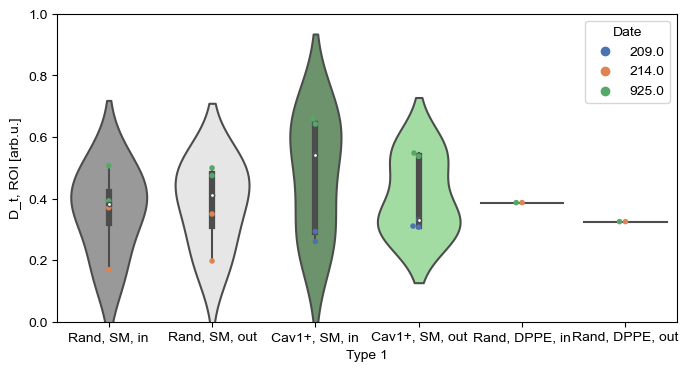

SM random in: 0.359 +- 0.061 µm^2/s
SM random out: 0.380 +- 0.060 µm^2/s
SM site in: 0.479 +- 0.076 µm^2/s
SM site out: 0.407 +- 0.050 µm^2/s
DPPE random in: 0.387 +- 0.000 µm^2/s
DPPE random out: 0.325 +- 0.000 µm^2/s
DPPE site in: nan +- nan µm^2/s
DPPE site out: nan +- nan µm^2/s


In [13]:
### ALL - DTRANSs - VIOLIN + SWARM

dapps_all_smsite = []
dates = track_data_comb_site_sm['date'].unique()
for date in dates:
    date_data = roi_data_comb_site_sm[roi_data_comb_site_sm['date']==date].copy()
    date_data_tracks = track_data_comb_site_sm[track_data_comb_site_sm['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if not roi_data['site_moved'].iloc[0]:
                if ~np.isnan(roi_data['tracks_in_ratio'].to_numpy()):
                    n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                    if n_tracks > n_tracks_lim_dtranscirc:
                        if len(roi_data['dtrans_site_inner'].to_numpy()[0]) > n_locs_dtrans:
                            dapps_all_smsite.append([np.nanmean(roi_data['dtrans_site_inner'].to_numpy()[0]), np.nanmean(roi_data['dtrans_site_outside'].to_numpy()[0]), int(date)])

dapps_all_smrandom = []
dates = track_data_comb_random_sm['date'].unique()
for date in dates:
    date_data = roi_data_comb_random_sm[roi_data_comb_random_sm['date']==date].copy()
    date_data_tracks = track_data_comb_random_sm[track_data_comb_random_sm['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if not roi_data['site_moved'].iloc[0]:
                if ~np.isnan(roi_data['tracks_in_ratio'].to_numpy()):
                    n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                    if n_tracks > n_tracks_lim_dtranscirc:
                        if len(roi_data['dtrans_site_inner'].to_numpy()[0]) > n_locs_dtrans:
                            dapps_all_smrandom.append([np.nanmean(roi_data['dtrans_site_inner'].to_numpy()[0]), np.nanmean(roi_data['dtrans_site_outside'].to_numpy()[0]), int(date)])

dapps_all_dppesite = []
dates = track_data_comb_site_dppe['date'].unique()
for date in dates:
    date_data = roi_data_comb_site_dppe[roi_data_comb_site_dppe['date']==date].copy()
    date_data_tracks = track_data_comb_site_dppe[track_data_comb_site_dppe['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if not roi_data['site_moved'].iloc[0]:
                if ~np.isnan(roi_data['tracks_in_ratio'].to_numpy()):
                    n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                    if n_tracks > n_tracks_lim_dtranscirc:
                        if len(roi_data['dtrans_site_inner'].to_numpy()[0]) > n_locs_dtrans:
                            dapps_all_dppesite.append([np.nanmean(roi_data['dtrans_site_inner'].to_numpy()[0]), np.nanmean(roi_data['dtrans_site_outside'].to_numpy()[0]), int(date)])

dapps_all_dpperandom = []
dates = track_data_comb_random_dppe['date'].unique()
for date in dates:
    date_data = roi_data_comb_random_dppe[roi_data_comb_random_dppe['date']==date].copy()
    date_data_tracks = track_data_comb_random_dppe[track_data_comb_random_dppe['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if not roi_data['site_moved'].iloc[0]:
                if ~np.isnan(roi_data['tracks_in_ratio'].to_numpy()):
                    n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                    if n_tracks > n_tracks_lim_dtranscirc:
                        if len(roi_data['dtrans_site_inner'].to_numpy()[0]) > n_locs_dtrans:
                            dapps_all_dpperandom.append([np.nanmean(roi_data['dtrans_site_inner'].to_numpy()[0]), np.nanmean(roi_data['dtrans_site_outside'].to_numpy()[0]), int(date)])
                

dapps_in_smrandom = [dapps[0] for dapps in dapps_all_smrandom]
dapps_out_smrandom = [dapps[1] for dapps in dapps_all_smrandom]
dates_smrandom = [dapps[2] for dapps in dapps_all_smrandom]
dapps_in_smrandom = np.array([rat for rat in dapps_in_smrandom if rat==rat])
dates_in_smrandom = np.array([date for date, rat in zip(dates_smrandom, dapps_in_smrandom) if rat==rat])
dapps_out_smrandom = np.array([rat for rat in dapps_out_smrandom if rat==rat])
dates_out_smrandom = np.array([date for date, rat in zip(dates_smrandom, dapps_out_smrandom) if rat==rat])

dapps_in_smsite = [dapps[0] for dapps in dapps_all_smsite]
dapps_out_smsite = [dapps[1] for dapps in dapps_all_smsite]
dates_smsite = [dapps[2] for dapps in dapps_all_smsite]
dapps_in_smsite = np.array([rat for rat in dapps_in_smsite if rat==rat])
dates_in_smsite = np.array([date for date, rat in zip(dates_smsite, dapps_in_smsite) if rat==rat])
dapps_out_smsite = np.array([rat for rat in dapps_out_smsite if rat==rat])
dates_out_smsite = np.array([date for date, rat in zip(dates_smsite, dapps_out_smsite) if rat==rat])

dapps_in_dpperandom = [dapps[0] for dapps in dapps_all_dpperandom]
dapps_out_dpperandom = [dapps[1] for dapps in dapps_all_dpperandom]
dates_dpperandom = [dapps[2] for dapps in dapps_all_dpperandom]
dapps_in_dpperandom = np.array([rat for rat in dapps_in_dpperandom if rat==rat])
dates_in_dpperandom = np.array([date for date, rat in zip(dates_dpperandom, dapps_in_dpperandom) if rat==rat])
dapps_out_dpperandom = np.array([rat for rat in dapps_out_dpperandom if rat==rat])
dates_out_dpperandom = np.array([date for date, rat in zip(dates_dpperandom, dapps_out_dpperandom) if rat==rat])

dapps_in_dppesite = [dapps[0] for dapps in dapps_all_dppesite]
dapps_out_dppesite = [dapps[1] for dapps in dapps_all_dppesite]
dates_dppesite = [dapps[2] for dapps in dapps_all_dppesite]
dapps_in_dppesite = np.array([rat for rat in dapps_in_dppesite if rat==rat])
dates_in_dppesite = np.array([date for date, rat in zip(dates_dppesite, dapps_in_dppesite) if rat==rat])
dapps_out_dppesite = np.array([rat for rat in dapps_out_dppesite if rat==rat])
dates_out_dppesite = np.array([date for date, rat in zip(dates_dppesite, dapps_out_dppesite) if rat==rat])

datasmrandin = {'Type 1': ['Rand, SM, in'] * len(dapps_in_smrandom),
                'Date': np.array(dates_in_smrandom),
                'Total': np.array(dapps_in_smrandom)}
datasmrandout = {'Type 1': ['Rand, SM, out'] * len(dapps_out_smrandom),
                'Date': np.array(dates_out_smrandom),
                'Total': np.array(dapps_out_smrandom)}
datasmsitein = {'Type 1': ['Cav1+, SM, in'] * len(dapps_in_smsite),
                'Date': np.array(dates_in_smsite),
                'Total': np.array(dapps_in_smsite)}
datasmsiteout = {'Type 1': ['Cav1+, SM, out'] * len(dapps_out_smsite),
                'Date': np.array(dates_out_smsite),
                'Total': np.array(dapps_out_smsite)}
datadpperandin = {'Type 1': ['Rand, DPPE, in'] * len(dapps_in_dpperandom),
                'Date': np.array(dates_in_dpperandom),
                'Total': np.array(dapps_in_dpperandom)}
datadpperandout = {'Type 1': ['Rand, DPPE, out'] * len(dapps_out_dpperandom),
                'Date': np.array(dates_out_dpperandom),
                'Total': np.array(dapps_out_dpperandom)}
datadppesitein = {'Type 1': ['Cav1+, DPPE, in'] * len(dapps_in_dppesite),
                'Date': np.array(dates_in_dppesite),
                'Total': np.array(dapps_in_dppesite)}
datadppesiteout = {'Type 1': ['Cav1+, DPPE, out'] * len(dapps_out_dppesite),
                'Date': np.array(dates_out_dppesite),
                'Total': np.array(dapps_out_dppesite)}
df = pd.concat([pd.DataFrame(d) for d in [datasmrandin, datasmrandout, datasmsitein, datasmsiteout, datadpperandin, datadpperandout, datadppesitein, datadppesiteout]], ignore_index=True)

# plot
fig = plt.figure(figsize=(8, 4))
my_palette = {'Rand, SM, in': (0.6,0.6,0.6), 'Rand, SM, out': (0.9,0.9,0.9), 'Cav1+, SM, in': (0.4,0.6,0.4), 'Cav1+, SM, out': (0.6,0.9,0.6), 'Rand, DPPE, in': (0.6,0.6,0.6), 'Rand, DPPE, out': (0.9,0.9,0.9), 'Cav1+, DPPE, in': (0.6,0.4,0.6), 'Cav1+, DPPE, out': (0.9,0.6,0.9)}
sns.swarmplot(x='Type 1', y='Total', hue='Date', data=df, size=4, alpha=1.0, palette="deep")
sns.violinplot(x='Type 1', y='Total', data=df, inner='box', palette=my_palette)
plt.ylabel('D_t, ROI [arb.u.]')
plt.ylim(0,1)
plt.show()

print(f'SM random in: {np.mean(dapps_in_smrandom):.3f} +- {np.std(dapps_in_smrandom)/np.sqrt(len(dapps_in_smrandom)):.3f} µm^2/s')
print(f'SM random out: {np.mean(dapps_out_smrandom):.3f} +- {np.std(dapps_out_smrandom)/np.sqrt(len(dapps_out_smrandom)):.3f} µm^2/s')
print(f'SM site in: {np.mean(dapps_in_smsite):.3f} +- {np.std(dapps_in_smsite)/np.sqrt(len(dapps_in_smsite)):.3f} µm^2/s')
print(f'SM site out: {np.mean(dapps_out_smsite):.3f} +- {np.std(dapps_out_smsite)/np.sqrt(len(dapps_out_smsite)):.3f} µm^2/s')
print(f'DPPE random in: {np.mean(dapps_in_dpperandom):.3f} +- {np.std(dapps_in_dpperandom)/np.sqrt(len(dapps_in_dpperandom)):.3f} µm^2/s')
print(f'DPPE random out: {np.mean(dapps_out_dpperandom):.3f} +- {np.std(dapps_out_dpperandom)/np.sqrt(len(dapps_out_dpperandom)):.3f} µm^2/s')
print(f'DPPE site in: {np.mean(dapps_in_dppesite):.3f} +- {np.std(dapps_in_dppesite)/np.sqrt(len(dapps_in_dppesite)):.3f} µm^2/s')
print(f'DPPE site out: {np.mean(dapps_out_dppesite):.3f} +- {np.std(dapps_out_dppesite)/np.sqrt(len(dapps_out_dppesite)):.3f} µm^2/s')

In [14]:
## TRACK INCLUSION - ALL - SEABORN VIOLIN + SWARM
track_inclusion_site_sm = []
dates = roi_data_comb_site_sm['date'].unique()
for date in dates:
    date_data = roi_data_comb_site_sm[roi_data_comb_site_sm['date']==date].copy()
    date_data_tracks = track_data_comb_site_sm[track_data_comb_site_sm['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if roi_data['site_moved'].iloc[0]==False:
                if ~np.isnan(roi_data['tracks_in_ratio'].to_numpy()):
                    if roi_data['roi_size'].to_numpy()[0] == (1.0,1.0):
                        n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                        if n_tracks > n_tracks_lim_incl:
                            track_inclusion_site_sm.append(roi_data['tracks_in_ratio'].to_numpy())
track_inclusion_site_dppe = []
dates = roi_data_comb_site_dppe['date'].unique()
for date in dates:
    date_data = roi_data_comb_site_dppe[roi_data_comb_site_dppe['date']==date].copy()
    date_data_tracks = track_data_comb_site_dppe[track_data_comb_site_dppe['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if roi_data['site_moved'].iloc[0]==False:
                if ~np.isnan(roi_data['tracks_in_ratio'].to_numpy()):
                    if roi_data['roi_size'].to_numpy()[0] == (1.0,1.0):
                        n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                        if n_tracks > n_tracks_lim_incl:
                            track_inclusion_site_dppe.append(roi_data['tracks_in_ratio'].to_numpy())
track_inclusion_random_sm = []
dates = roi_data_comb_random_sm['date'].unique()
for date in dates:
    date_data = roi_data_comb_random_sm[roi_data_comb_random_sm['date']==date].copy()
    date_data_tracks = track_data_comb_random_sm[track_data_comb_random_sm['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if roi_data['site_moved'].iloc[0]==False:
                if ~np.isnan(roi_data['tracks_in_ratio'].to_numpy()):
                    if roi_data['roi_size'].to_numpy()[0] == (1.0,1.0):
                        n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                        if n_tracks > n_tracks_lim_incl:
                            track_inclusion_random_sm.append(roi_data['tracks_in_ratio'].to_numpy())
track_inclusion_random_dppe = []
dates = roi_data_comb_random_dppe['date'].unique()
for date in dates:
    date_data = roi_data_comb_random_dppe[roi_data_comb_random_dppe['date']==date].copy()
    date_data_tracks = track_data_comb_random_dppe[track_data_comb_random_dppe['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if roi_data['site_moved'].iloc[0]==False:
                if ~np.isnan(roi_data['tracks_in_ratio'].to_numpy()):
                    if roi_data['roi_size'].to_numpy()[0] == (1.0,1.0):
                        n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                        if n_tracks > n_tracks_lim_incl:
                            track_inclusion_random_dppe.append(roi_data['tracks_in_ratio'].to_numpy())

track_inclusion_random_sm = np.concatenate(track_inclusion_random_sm)
track_inclusion_site_sm = np.concatenate(track_inclusion_site_sm)
track_inclusion_random_dppe = np.concatenate(track_inclusion_random_dppe)
track_inclusion_site_dppe = np.concatenate(track_inclusion_site_dppe)

# sample data
datasmrand = {'Type 1': ['Rand, SM'] * len(track_inclusion_random_sm),
         'Total': np.array(track_inclusion_random_sm)}
datasmsite = {'Type 1': ['Cav1+, SM'] * len(track_inclusion_site_sm),
         'Total': np.array(track_inclusion_site_sm)}
datadpperand = {'Type 1': ['Rand, DPPE'] * len(track_inclusion_random_dppe),
         'Total': np.array(track_inclusion_random_dppe)}
datadppesite = {'Type 1': ['Cav1+, DPPE'] * len(track_inclusion_site_dppe),
         'Total': np.array(track_inclusion_site_dppe)}
df = pd.concat([pd.DataFrame(d) for d in [datasmrand, datasmsite, datadpperand, datadppesite]], ignore_index=True)

# plot
fig = plt.figure(figsize=(4, 4))
my_palette = {'Rand, SM': (0.7,0.7,0.7), 'Cav1+, SM': (0.4,0.7,0.4), 'Rand, DPPE': (0.7,0.7,0.7), 'Cav1+, DPPE': (0.7,0.4,0.7)}
sns.swarmplot(x='Type 1', y='Total', data=df, color='#000000', size=4, alpha=0.5)
sns.violinplot(x='Type 1', y='Total', data=df, inner='box', palette=my_palette)
plt.ylabel('Track inclusion ratio [arb.u.]')
plt.ylim([0,0.5])
plt.show()

print(f'SM random: {np.mean(track_inclusion_random_sm):.3f} +- {np.std(track_inclusion_random_sm)/np.sqrt(len(track_inclusion_random_sm)):.3f}')
print(f'SM site: {np.mean(track_inclusion_site_sm):.3f} +- {np.std(track_inclusion_site_sm)/np.sqrt(len(track_inclusion_site_sm)):.3f}')
print(f'DPPE random: {np.mean(track_inclusion_random_dppe):.3f} +- {np.std(track_inclusion_random_dppe)/np.sqrt(len(track_inclusion_random_dppe)):.3f}')
print(f'DPPE site: {np.mean(track_inclusion_site_dppe):.3f} +- {np.std(track_inclusion_site_dppe)/np.sqrt(len(track_inclusion_site_dppe)):.3f}')

print('SM')
result_rois = scipy.stats.ttest_ind(track_inclusion_site_sm,track_inclusion_random_sm,alternative='greater')
print(result_rois)
print('DPPE')
result_rois = scipy.stats.ttest_ind(track_inclusion_site_dppe,track_inclusion_random_dppe,alternative='greater')
print(result_rois)
print('Site')
result_rois = scipy.stats.ttest_ind(track_inclusion_site_sm,track_inclusion_site_dppe,alternative='greater')
print(result_rois)
print('Random')
result_rois = scipy.stats.ttest_ind(track_inclusion_random_sm,track_inclusion_random_dppe,alternative='greater')
print(result_rois)

ValueError: need at least one array to concatenate

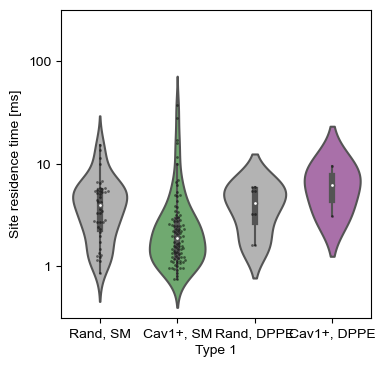

SM random: 4.432 +- 0.463 ms
SM site: 3.351 +- 0.558 ms
DPPE random: 4.058 +- 0.617 ms
DPPE site: 6.249 +- 1.486 ms
SM
Ttest_indResult(statistic=-1.2564115116974306, pvalue=0.21116914306124088)
DPPE
Ttest_indResult(statistic=1.4600396418738255, pvalue=0.1782867529301965)
Site
Ttest_indResult(statistic=0.9349766933901786, pvalue=0.35227478942776447)
Random
Ttest_indResult(statistic=-0.3251460028041148, pvalue=0.7464007062968829)


In [16]:
## RESIDENCE TIMES - ALL - SEABORN VOLIN + SWARM

residence_time_site_sm_raw = []
dates = roi_data_comb_site_sm['date'].unique()
for date in dates:
    date_data = roi_data_comb_site_sm[roi_data_comb_site_sm['date']==date].copy()
    date_data_tracks = track_data_comb_site_sm[track_data_comb_site_sm['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if roi_data['site_moved'].iloc[0]==False:
                n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                restimes = roi_data_tracks['restimes_in'].to_numpy()
                if len(restimes) > 0:
                    restimes = np.concatenate(restimes)
                    restimes = restimes[~np.isnan(restimes)]
                    if n_tracks > 0:
                        residence_time_site_sm_raw.append(restimes*1e3)
residence_time_site_dppe_raw = []
dates = roi_data_comb_site_dppe['date'].unique()
for date in dates:
    date_data = roi_data_comb_site_dppe[roi_data_comb_site_dppe['date']==date].copy()
    date_data_tracks = track_data_comb_site_dppe[track_data_comb_site_dppe['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if roi_data['site_moved'].iloc[0]==False:
                n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                restimes = roi_data_tracks['restimes_in'].to_numpy()
                if len(restimes) > 0:
                    restimes = np.concatenate(restimes)
                    restimes = restimes[~np.isnan(restimes)]
                    if n_tracks > 0:
                        residence_time_site_dppe_raw.append(restimes*1e3)
residence_time_random_sm_raw = []
dates = roi_data_comb_random_sm['date'].unique()
for date in dates:
    date_data = roi_data_comb_random_sm[roi_data_comb_random_sm['date']==date].copy()
    date_data_tracks = track_data_comb_random_sm[track_data_comb_random_sm['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if roi_data['site_moved'].iloc[0]==False:
                n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                restimes = roi_data_tracks['restimes_in'].to_numpy()
                if len(restimes) > 0:
                    restimes = np.concatenate(restimes)
                    restimes = restimes[~np.isnan(restimes)]
                    if n_tracks > 0:
                        residence_time_random_sm_raw.append(restimes*1e3)
residence_time_random_dppe_raw = []
dates = roi_data_comb_random_dppe['date'].unique()
for date in dates:
    date_data = roi_data_comb_random_dppe[roi_data_comb_random_dppe['date']==date].copy()
    date_data_tracks = track_data_comb_random_dppe[track_data_comb_random_dppe['date']==date].copy()
    confs = date_data['conf_idx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['conf_idx']==conf].copy()
        conf_data_tracks = date_data_tracks[date_data_tracks['confidx']==conf].copy()
        rois = conf_data['roi_idx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roi_idx']==roi].copy()
            roi_data_tracks = conf_data_tracks[conf_data_tracks['roiidx']==roi].copy()
            if roi_data['site_moved'].iloc[0]==False:
                n_tracks = np.count_nonzero(roi_data_tracks['inout_incl_flag']==True) + np.count_nonzero(roi_data_tracks['inout_incl_flag']==False)
                restimes = roi_data_tracks['restimes_in'].to_numpy()
                if len(restimes) > 0:
                    restimes = np.concatenate(restimes)
                    restimes = restimes[~np.isnan(restimes)]
                    if n_tracks > 0:
                        residence_time_random_dppe_raw.append(restimes*1e3)

residence_time_random_sm = np.concatenate([np.log10(restime) for idx,restime in enumerate(residence_time_random_sm_raw) if np.any(~np.isnan(restime)) and idx%1==0])
residence_time_site_sm = np.concatenate([np.log10(restime) for idx,restime in enumerate(residence_time_site_sm_raw) if np.any(~np.isnan(restime)) and idx%1==0])
residence_time_random_dppe = np.concatenate([np.log10(restime) for idx,restime in enumerate(residence_time_random_dppe_raw) if np.any(~np.isnan(restime)) and idx%1==0])
residence_time_site_dppe = np.concatenate([np.log10(restime) for idx,restime in enumerate(residence_time_site_dppe_raw) if np.any(~np.isnan(restime)) and idx%1==0])

residence_time_random_sm_raw = np.concatenate([restime for idx,restime in enumerate(residence_time_random_sm_raw) if np.any(~np.isnan(restime)) and idx%1==0])
residence_time_site_sm_raw = np.concatenate([restime for idx,restime in enumerate(residence_time_site_sm_raw) if np.any(~np.isnan(restime)) and idx%1==0])
residence_time_random_dppe_raw = np.concatenate([restime for idx,restime in enumerate(residence_time_random_dppe_raw) if np.any(~np.isnan(restime)) and idx%1==0])
residence_time_site_dppe_raw = np.concatenate([restime for idx,restime in enumerate(residence_time_site_dppe_raw) if np.any(~np.isnan(restime)) and idx%1==0])

# sample data
datasmrand = {'Type 1': ['Rand, SM'] * len(residence_time_random_sm),
         'Total': np.array(residence_time_random_sm)}
datasmsite = {'Type 1': ['Cav1+, SM'] * len(residence_time_site_sm),
         'Total': np.array(residence_time_site_sm)}
datadpperand = {'Type 1': ['Rand, DPPE'] * len(residence_time_random_dppe),
         'Total': np.array(residence_time_random_dppe)}
datadppesite = {'Type 1': ['Cav1+, DPPE'] * len(residence_time_site_dppe),
         'Total': np.array(residence_time_site_dppe)}
df = pd.concat([pd.DataFrame(d) for d in [datasmrand, datasmsite, datadpperand, datadppesite]], ignore_index=True)

# plot
plt.figure(figsize=[4,4])
my_palette = {'Rand, SM': (0.7,0.7,0.7), 'Cav1+, SM': (0.4,0.7,0.4), 'Rand, DPPE': (0.7,0.7,0.7), 'Cav1+, DPPE': (0.7,0.4,0.7)}
sns.swarmplot(x='Type 1', y='Total', data=df, color='#000000', size=2, alpha=0.5)
sns.violinplot(x='Type 1', y='Total', data=df, inner='box', palette=my_palette)
plt.yticks([0,1,2], labels=[1, 10, 100])
plt.ylabel('Site residence time [ms]')
plt.ylim([-0.5,2.5])
plt.show()

print(f'SM random: {np.mean(residence_time_random_sm_raw):.3f} +- {np.std(residence_time_random_sm_raw)/np.sqrt(len(residence_time_random_sm_raw)):.3f} ms')
print(f'SM site: {np.mean(residence_time_site_sm_raw):.3f} +- {np.std(residence_time_site_sm_raw)/np.sqrt(len(residence_time_site_sm_raw)):.3f} ms')
print(f'DPPE random: {np.mean(residence_time_random_dppe_raw):.3f} +- {np.std(residence_time_random_dppe_raw)/np.sqrt(len(residence_time_random_dppe_raw)):.3f} ms')
print(f'DPPE site: {np.mean(residence_time_site_dppe_raw):.3f} +- {np.std(residence_time_site_dppe_raw)/np.sqrt(len(residence_time_site_dppe_raw)):.3f} ms')

print('SM')
result_rois = scipy.stats.ttest_ind(residence_time_site_sm_raw,residence_time_random_sm_raw)
print(result_rois)
print('DPPE')
result_rois = scipy.stats.ttest_ind(residence_time_site_dppe_raw,residence_time_random_dppe_raw)
print(result_rois)
print('Site')
result_rois = scipy.stats.ttest_ind(residence_time_site_dppe_raw,residence_time_site_sm_raw)
print(result_rois)
print('Random')
result_rois = scipy.stats.ttest_ind(residence_time_random_dppe_raw,residence_time_random_sm_raw)
print(result_rois)

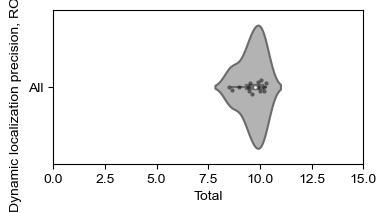

SM random: 9.536 +- 0.190 nm
SM site: 9.286 +- 0.295 nm
DPPE random: 10.048 +- 0.075 nm
DPPE site: 9.993 +- 0.000 nm
All comb: 9.626 +- 0.148 nm


In [17]:
### ALL - LOCALIZATION PRECISION FROM DAPP FIT - VIOLIN + SWARM

locprec_all_smsite = []
dates = track_data_comb_site_sm['date'].unique()
for date in dates:
    date_data = track_data_comb_site_sm[track_data_comb_site_sm['date']==date].copy()
    confs = date_data['confidx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['confidx']==conf].copy()
        rois = conf_data['roiidx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roiidx']==roi].copy()
            locprecs = []
            for _, row in roi_data.iterrows():
                if row['inout_flag'] == True:
                    if len(row['dists_in']) > 0 or len(row['dists_out']):
                        dists = np.concatenate([row['dists_in'],row['dists_out']])
                        dts = np.concatenate([row['dts_in'],row['dts_out']])
                        if len(dists) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts, dists))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts, dists))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            locprecs.append(popt_msd[1])
            if len(locprecs) > n_tracks_lim_dapp and np.mean(locprecs)>0:
                locprec_all_smsite.append(np.array([np.mean(locprecs)]))
locprec_all_smrandom = []
dates = track_data_comb_random_sm['date'].unique()
for date in dates:
    date_data = track_data_comb_random_sm[track_data_comb_random_sm['date']==date].copy()
    confs = date_data['confidx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['confidx']==conf].copy()
        rois = conf_data['roiidx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roiidx']==roi].copy()
            locprecs = []
            for _, row in roi_data.iterrows():
                if row['inout_flag'] == True:
                    if len(row['dists_in']) > 0 or len(row['dists_out']):
                        dists = np.concatenate([row['dists_in'],row['dists_out']])
                        dts = np.concatenate([row['dts_in'],row['dts_out']])
                        if len(dists) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts, dists))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts, dists))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            locprecs.append(popt_msd[1])
            if len(locprecs) > n_tracks_lim_dapp and np.mean(locprecs)>0:
                locprec_all_smrandom.append(np.array([np.mean(locprecs)]))
locprec_all_dppesite = []
dates = track_data_comb_site_dppe['date'].unique()
for date in dates:
    date_data = track_data_comb_site_dppe[track_data_comb_site_dppe['date']==date].copy()
    confs = date_data['confidx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['confidx']==conf].copy()
        rois = conf_data['roiidx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roiidx']==roi].copy()
            locprecs = []
            for _, row in roi_data.iterrows():
                if row['inout_flag'] == True:
                    if len(row['dists_in']) > 0 or len(row['dists_out']):
                        dists = np.concatenate([row['dists_in'],row['dists_out']])
                        dts = np.concatenate([row['dts_in'],row['dts_out']])
                        if len(dists) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts, dists))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts, dists))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            locprecs.append(popt_msd[1])
            if len(locprecs) > n_tracks_lim_dapp and np.mean(locprecs)>0:
                locprec_all_dppesite.append(np.array([np.mean(locprecs)]))
locprec_all_dpperandom = []
dates = track_data_comb_random_dppe['date'].unique()
for date in dates:
    date_data = track_data_comb_random_dppe[track_data_comb_random_dppe['date']==date].copy()
    confs = date_data['confidx'].unique()
    for conf in confs:
        conf_data = date_data[date_data['confidx']==conf].copy()
        rois = conf_data['roiidx'].unique()
        for roi in rois:
            roi_data = conf_data[conf_data['roiidx']==roi].copy()
            locprecs = []
            for _, row in roi_data.iterrows():
                if row['inout_flag'] == True:
                    if len(row['dists_in']) > 0 or len(row['dists_out']):
                        dists = np.concatenate([row['dists_in'],row['dists_out']])
                        dts = np.concatenate([row['dts_in'],row['dts_out']])
                        if len(dists) > fit_len_thresh:
                            x_fit = np.array([x for _, x in sorted(zip(dts, dists))])
                            t_fit = np.array([t for t, _ in sorted(zip(dts, dists))])
                            popt_msd, _ = curve_fit(f_msd, t_fit, x_fit)
                            locprecs.append(popt_msd[1])
            if len(locprecs) > n_tracks_lim_dapp and np.mean(locprecs)>0:
                locprec_all_dpperandom.append(np.array([np.mean(locprecs)]))
                
locprec_all_smrandom = np.concatenate(locprec_all_smrandom)
locprec_all_smsite = np.concatenate(locprec_all_smsite)
locprec_all_dpperandom = np.concatenate(locprec_all_dpperandom)
locprec_all_dppesite = np.concatenate(locprec_all_dppesite)
locprec_all = np.concatenate([locprec_all_smrandom, locprec_all_smsite, locprec_all_dpperandom, locprec_all_dppesite])

locprec_smrandom = [locprec*1000 for locprec in locprec_all_smrandom]
locprec_smrandom = np.array([locprec for locprec in locprec_smrandom if locprec==locprec])
locprec_smsite = [locprec*1000 for locprec in locprec_all_smsite]
locprec_smsite = np.array([locprec for locprec in locprec_smsite if locprec==locprec])
locprec_dpperandom = [locprec*1000 for locprec in locprec_all_dpperandom]
locprec_dpperandom = np.array([locprec for locprec in locprec_dpperandom if locprec==locprec])
locprec_dppesite = [locprec*1000 for locprec in locprec_all_dppesite]
locprec_dppesite = np.array([locprec for locprec in locprec_dppesite if locprec==locprec])
locprecs = [locprec*1000 for locprec in locprec_all]
locprecs = np.array([locprec for locprec in locprecs if locprec==locprec])

datasmrand = {'Type 1': ['Rand, SM'] * len(locprec_smrandom),
         'Total': np.array(locprec_smrandom)}
datasmsite = {'Type 1': ['Cav1+, SM'] * len(locprec_smsite),
         'Total': np.array(locprec_smsite)}
datadpperand = {'Type 1': ['Rand, DPPE'] * len(locprec_dpperandom),
         'Total': np.array(locprec_dpperandom)}
datadppesite = {'Type 1': ['Cav1+, DPPE'] * len(locprec_dppesite),
         'Total': np.array(locprec_dppesite)}
dataall = {'Type 1': ['All'] * len(locprecs),
         'Total': np.array(locprecs)}
df = pd.concat([pd.DataFrame(d) for d in [datasmrand, datasmsite, datadpperand, datadppesite]], ignore_index=True)
df_all = pd.concat([pd.DataFrame(d) for d in [dataall]], ignore_index=True)

# plot
fig = plt.figure(figsize=(4, 2))

my_palette = {'All': (0.7,0.7,0.7)}
sns.swarmplot(y='Type 1', x='Total', data=df_all, color='#000000', size=3, alpha=0.5)
sns.violinplot(y='Type 1', x='Total', data=df_all, inner='box', palette=my_palette)

plt.ylabel('Dynamic localization precision, ROI [nm]')
plt.xlim(0,15)
plt.show()

print(f'SM random: {np.mean(locprec_smrandom):.3f} +- {np.std(locprec_smrandom)/np.sqrt(len(locprec_smrandom)):.3f} nm')
print(f'SM site: {np.mean(locprec_smsite):.3f} +- {np.std(locprec_smsite)/np.sqrt(len(locprec_smsite)):.3f} nm')
print(f'DPPE random: {np.mean(locprec_dpperandom):.3f} +- {np.std(locprec_dpperandom)/np.sqrt(len(locprec_dpperandom)):.3f} nm')
print(f'DPPE site: {np.mean(locprec_dppesite):.3f} +- {np.std(locprec_dppesite)/np.sqrt(len(locprec_dppesite)):.3f} nm')
print(f'All comb: {np.mean(locprecs):.3f} +- {np.std(locprecs)/np.sqrt(len(locprecs)):.3f} nm')